# Titration Calculator #

In [20]:
#Titration Calculator for Website
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [21]:
#This is the base class for the titration calculator
class PHCalculator():
    def __init__(self,  volume_analyte, cAcid, cBase):
        self.cAcid = cAcid
        self.cBase = cBase
        self.kw = 1e-14
        self.volume_analyte = volume_analyte

#the def calculate_pH is the function that calculates the pH of the solution after a titration
    def calculate_pH(self, volume_titrant):
        return NotImplemented("This is the base calculator class. Please use a subclass instead.")

#the def plot_curve is the function that plots the pH of the solution after a titration
    def plot_curve(self, volume_titrant_list):
        pH_list = []
        for volume_titrant in volume_titrant_list:
            pH_list.append(self.calculate_pH(volume_titrant))
        fig=plt.figure()
        ax=fig.add_subplot(111)

        ax.plot(volume_titrant_list, pH_list )
        ax.set_xlabel("Volume of Titrant (mL)")
        ax.set_ylabel("pH")
        ax.set_title("pH vs. Volume of Titrant")
        ax.set_ylim(0,14)
        return fig, ax

#the def df_results is the function that creates a dataframe with pH and volume of titrant
    def df_results(self, volume_titrant_list):
        pH_list = []
        for volume_titrant in volume_titrant_list:
            pH_list.append(self.calculate_pH(volume_titrant))
        df = pd.DataFrame({'Volume of Titrant (mL)': volume_titrant_list, 'pH': pH_list})
        return df


The following code is the subclass for strong acid titrations.

In [22]:
#This is the subclass for strong acid titrations
class PHCalculatorStrongAcid(PHCalculator):
    def __init__(self, volume_analyte, cAcid, cBase):
        super().__init__(volume_analyte,cAcid, cBase)

    def calculate_pH(self, volume_titrant):
        Va = self.volume_analyte
        Vb = volume_titrant
        CaVa= self.cAcid * Va
        CbVb= self.cBase * Vb
        totalVolume = Va+Vb
        if CaVa>CbVb:
            mProton = (CaVa - CbVb)/totalVolume
            pH = -np.log10(mProton).round(2)
        elif CaVa==CbVb:
            pH = 7
        else:
            mProton = (CbVb - CaVa)/totalVolume
            pH = 14 + np.log10(mProton).round(2)
        return np.clip(pH, 0, 14)


In [23]:
#This is the subclass for strong base titrations
class PHCalculatorStrongBase(PHCalculator):
    def __init__(self, volume_analyte, cAcid, cBase):
        super().__init__(volume_analyte, cAcid, cBase)

    def calculate_pH(self, volume_titrant):
        Va = volume_titrant
        Vb = self.volume_analyte
        CaVa= self.cAcid * Va
        CbVb= self.cBase * Vb
        totalVolume = Va+Vb
        if CbVb>CaVa:
            mHydroxide = (CbVb-CaVa)/totalVolume
            pH= 14 + np.log10(mHydroxide).round(2)
        elif CaVa==CbVb:
            pH = 7
        else:
            mProton = (CaVa-CbVb)/totalVolume
            pH = -np.log10(mProton).round(2)
        return np.clip(pH, 0, 14)


In [24]:
#This is the subclass for weak acid titrations
class PHCalculatorWeakAcid(PHCalculator):
    def __init__(self, volume_analyte, cAcid, cBase, ka):
        super().__init__(volume_analyte, cAcid, cBase)
        self.ka = ka

    def calculate_pH(self, volume_titrant):
        Va = self.volume_analyte
        Vb = volume_titrant
        totalVolume = Va+Vb
        CaVa= self.cAcid * Va
        CbVb= self.cBase * Vb
        concentrationphi= self.cAcid/self.cBase
        phi=Vb/(concentrationphi*Va)
        kb=self.kw/self.ka

        if phi==0:
            mProton=np.sqrt(self.ka* self.cAcid)
            pH=-np.log10(mProton).round(3)
        elif phi>0 and phi<1:
            mProton=self.ka*(1-phi)/phi
            pH=-np.log10(mProton).round(3)
        elif phi==1:
            mHydroxide=np.sqrt(kb*(CaVa/totalVolume))
            pH=14+np.log10(mHydroxide).round(3)
        else:
            mol=CbVb-CaVa
            mHydroxide=mol/totalVolume
            pH=14+np.log10(mHydroxide).round(3)

        return np.clip(pH, 0, 14)

In [25]:
#This is the subclass for weak base titrations
class PHCalculatorWeakBase(PHCalculator):
    def __init__(self, volume_analyte,  cAcid, cBase, kb):
        super().__init__(volume_analyte,  cAcid, cBase)
        self.kb = kb

    def calculate_pH(self, volume_titrant):
        Va = volume_titrant
        Vb = self.volume_analyte
        totalVolume = Va+Vb
        CaVa= self.cAcid * Va
        CbVb= self.cBase * Vb
        concentrationphi= self.cBase/self.cAcid
        phi=Va/(concentrationphi*Vb)
        ka=self.kw/self.kb

        if phi==0:
            mHydroxide=np.sqrt(self.kb* self.cBase)
            pH=14+np.log10(mHydroxide).round(3)
        elif phi>0 and phi<1:
            mHydroxide=self.kb*(1-phi)/phi
            pH=14+np.log10(mHydroxide).round(3)
        elif phi==1:
            mProton=np.sqrt(ka*(CbVb/totalVolume))
            pH=-np.log10(mProton).round(3)
        else:
            mol=CaVa-CbVb
            mProton=mol/totalVolume
            pH=-np.log10(mProton).round(3)
        return np.clip(pH, 0, 14)

# Titration Examples 

## Strong Acid vs. Strong Base

,Volume of Titrant (mL),pH
0,0.000000,0.30
1,0.508475,0.35
2,1.016949,0.39
3,1.525424,0.43
4,2.033898,0.48
5,2.542373,0.53
6,3.050847,0.57
7,3.559322,0.62
8,4.067797,0.68
9,4.576271,0.73


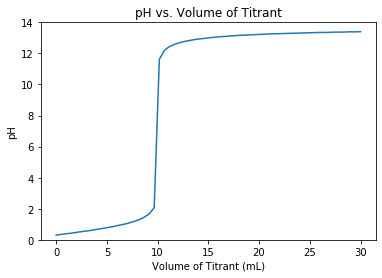

In [26]:
volume_analyte = 10 #mL
volume_titrant_list = np.linspace(0,30, 60)
cAcid = 0.5 # [mol/L or M]
cBase = 0.5 # [mol/L or M]
calculator = PHCalculatorStrongAcid(volume_analyte,cAcid, cBase)
calculator.plot_curve(volume_titrant_list)
calculator.df_results(volume_titrant_list)

## Strong Base vs. Strong Acid

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fae9b62b590>)

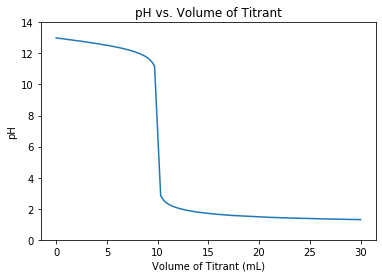

In [27]:
volume_analyte = 10 #mL
volume_titrant_list = np.linspace(0,30, 100)
cAcid = 0.1 # [mol/L or M]
cBase = 0.1 # [mol/L or M]
calculator = PHCalculatorStrongBase(volume_analyte, cAcid, cBase)
calculator.plot_curve(volume_titrant_list)

## Weak Acid vs. Strong Base

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fae9d6eb810>)

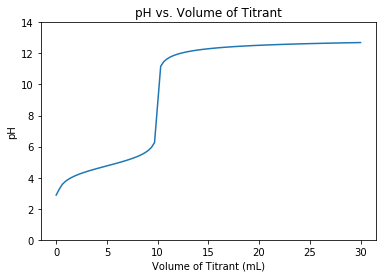

In [28]:
volume_analyte = 10 #mL
volume_titrant_list = np.linspace(0,30, 100)
cAcid = 0.1 # [mol/L or M]
cBase = 0.1 # [mol/L or M]
ka = 10**-4.76 #CH3COOH

calculator = PHCalculatorWeakAcid(volume_analyte, cAcid, cBase, ka)
calculator.plot_curve(volume_titrant_list)

## Weak Base vs. Strong Acid

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fae9d8d1950>)

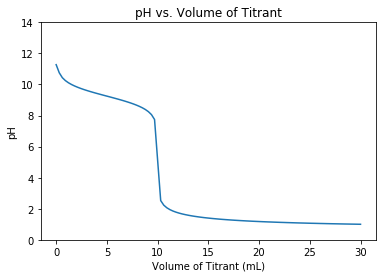

In [29]:
volume_analyte = 10 #mL
volume_titrant_list = np.linspace(0,30, 100)
cAcid = 0.2 # [mol/L or M]
cBase = 0.2 # [mol/L or M]
kb = 10**-4.75 #NH3

calculator = PHCalculatorWeakBase(volume_analyte, cAcid, cBase, kb)
calculator.plot_curve(volume_titrant_list)